In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

magic number:2051, number of pics: 60000张, pic size: 28*28
10000decoded
20000decoded
30000decoded
40000decoded
50000decoded
60000decoded
magic number:2049, number of pic: 60000
10000decoded
20000decoded
30000decoded
40000decoded
50000decoded
60000decoded
magic number:2051, number of pics: 10000张, pic size: 28*28
10000decoded
magic number:2049, number of pic: 10000
10000decoded
5.0


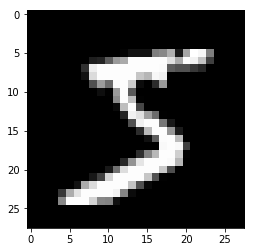

0.0


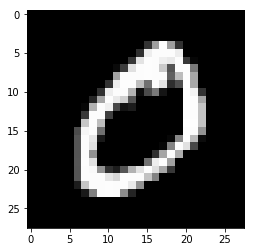

4.0


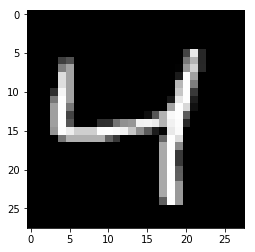

1.0


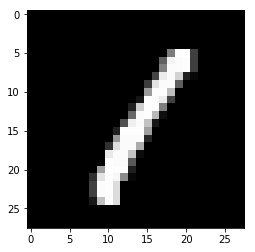

9.0


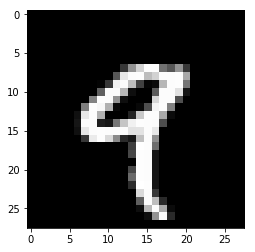

2.0


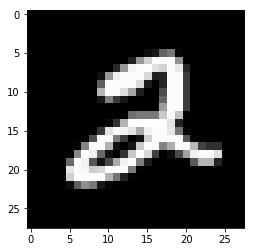

1.0


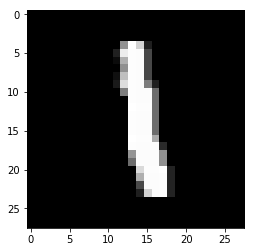

3.0


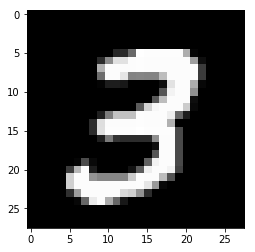

1.0


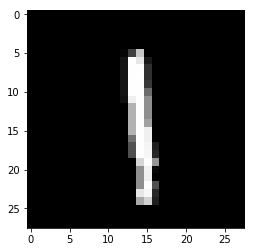

4.0


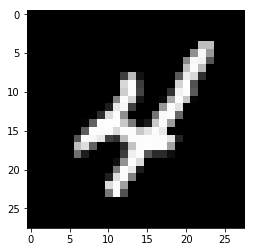

done


In [2]:
# encoding: utf-8
# contributor: https://www.jianshu.com/p/84f72791806f
import numpy as np
import struct
import matplotlib.pyplot as plt

# training set
train_images_idx3_ubyte_file = 'train-images.idx3-ubyte'
# training labels
train_labels_idx1_ubyte_file = 'train-labels.idx1-ubyte'

# testing set
test_images_idx3_ubyte_file = 't10k-images.idx3-ubyte'
# testing label
test_labels_idx1_ubyte_file = 't10k-labels.idx1-ubyte'


def decode_idx3_ubyte(idx3_ubyte_file):

    # reading binary file
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # decoding heading information, magic #, # of pic, Pic size, respectively
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print ('magic number:%d, number of pics: %d张, pic size: %d*%d' % (magic_number, num_images, num_rows, num_cols))

    # decoding data set
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print ('%d' % (i + 1) + 'decoded')
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images


def decode_idx1_ubyte(idx1_ubyte_file):
  
    # reading binary file
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # decoding heading information, magic number, labels, respectively
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print ('magic number:%d, number of pic: %d' % (magic_number, num_images))

    # decoding data set
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print ('%d' % (i + 1) + 'decoded')
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):

    return decode_idx3_ubyte(idx_ubyte_file)


def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):

    return decode_idx1_ubyte(idx_ubyte_file)


def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):

    return decode_idx3_ubyte(idx_ubyte_file)


def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):

    return decode_idx1_ubyte(idx_ubyte_file)




def run():
    train_images = load_train_images()
    train_labels = load_train_labels()
    test_images = load_test_images()
    test_labels = load_test_labels()

    # check the top 10 labels
    for i in range(10):
        print (train_labels[i])
        plt.imshow(train_images[i], cmap='gray')
        plt.show()
    print ('done')

if __name__ == '__main__':
    run()


In [3]:
# load mnist
X_train = load_train_images(idx_ubyte_file='train-images.idx3-ubyte')
y_train = load_train_labels(idx_ubyte_file='train-labels.idx1-ubyte')
X_test = load_train_images(idx_ubyte_file='t10k-images.idx3-ubyte')
y_test = load_train_labels(idx_ubyte_file='t10k-labels.idx1-ubyte')

magic number:2051, number of pics: 60000张, pic size: 28*28
10000decoded
20000decoded
30000decoded
40000decoded
50000decoded
60000decoded
magic number:2049, number of pic: 60000
10000decoded
20000decoded
30000decoded
40000decoded
50000decoded
60000decoded
magic number:2051, number of pics: 10000张, pic size: 28*28
10000decoded
magic number:2049, number of pic: 10000
10000decoded


In [4]:
X_train.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

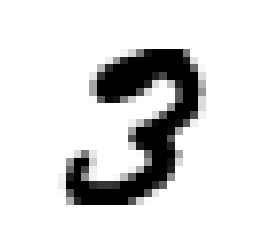

In [5]:
%matplotlib inline

plt.imshow(X_train[12345], cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')

In [6]:
y_train[12345]

3.0

In [7]:
init= tf.global_variables_initializer()

In [8]:
# leak ReLUS
def leaky_relu(z, name=None):
    return tf.maximum(0.01*z, z, name=name)

In [9]:
# the structure of neural network
n_inputs= 28*28
n_hidden1=300
n_hidden2=150
n_outputs=10

In [10]:
# implement Batch Normalization
from tensorflow.contrib.layers import batch_norm, fully_connected

X= tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y= tf.placeholder(tf.int32, shape=(None), name='y')


In [11]:
# developing network
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=leaky_relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [12]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [13]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [14]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y_train, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [15]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [19]:
# data washig
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 0s 0us/step


In [27]:
len(X_train)

55000

In [17]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [24]:
# here some problems cannot figure out why, even I tried code from author of the book
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

InvalidArgumentError: First dimension of predictions 50 must match length of targets 60000
	 [[Node: eval/in_top_k/InTopKV2 = InTopKV2[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dnn/outputs/BiasAdd, eval/in_top_k/InTopKV2/targets, eval/in_top_k/InTopKV2/k)]]

Caused by op 'eval/in_top_k/InTopKV2', defined at:
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/ioloop.py", line 759, in _run_callback
    ret = callback()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-282ea7ee49c3>", line 2, in <module>
    correct = tf.nn.in_top_k(logits, y_train, 1)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 2692, in in_top_k
    return gen_nn_ops.in_top_kv2(predictions, targets, k, name=name)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 4228, in in_top_kv2
    "InTopKV2", predictions=predictions, targets=targets, k=k, name=name)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): First dimension of predictions 50 must match length of targets 60000
	 [[Node: eval/in_top_k/InTopKV2 = InTopKV2[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dnn/outputs/BiasAdd, eval/in_top_k/InTopKV2/targets, eval/in_top_k/InTopKV2/k)]]


In [28]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc9da41ec18>, '_master': '',

INFO:tensorflow:loss = 0.3514816, step = 301 (0.363 sec)
INFO:tensorflow:global_step/sec: 270.378
INFO:tensorflow:loss = 0.1905212, step = 401 (0.370 sec)
INFO:tensorflow:global_step/sec: 296.323
INFO:tensorflow:loss = 0.2601043, step = 501 (0.337 sec)
INFO:tensorflow:global_step/sec: 287.096
INFO:tensorflow:loss = 0.08432088, step = 601 (0.348 sec)
INFO:tensorflow:global_step/sec: 263.999
INFO:tensorflow:loss = 0.12809992, step = 701 (0.379 sec)
INFO:tensorflow:global_step/sec: 272.314
INFO:tensorflow:loss = 0.2064446, step = 801 (0.367 sec)
INFO:tensorflow:global_step/sec: 253.722
INFO:tensorflow:loss = 0.14563118, step = 901 (0.394 sec)
INFO:tensorflow:global_step/sec: 329.879
INFO:tensorflow:loss = 0.19505653, step = 1001 (0.304 sec)
INFO:tensorflow:global_step/sec: 313.575
INFO:tensorflow:loss = 0.21588585, step = 1101 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.754
INFO:tensorflow:loss = 0.12662819, step = 1201 (0.319 sec)
INFO:tensorflow:global_step/sec: 283.64
INFO:tensorf

INFO:tensorflow:loss = 0.010604121, step = 8501 (0.343 sec)
INFO:tensorflow:global_step/sec: 272.825
INFO:tensorflow:loss = 0.007531607, step = 8601 (0.367 sec)
INFO:tensorflow:global_step/sec: 260.653
INFO:tensorflow:loss = 0.001060601, step = 8701 (0.383 sec)
INFO:tensorflow:global_step/sec: 284.669
INFO:tensorflow:loss = 0.014571176, step = 8801 (0.351 sec)
INFO:tensorflow:global_step/sec: 289.275
INFO:tensorflow:loss = 0.003015422, step = 8901 (0.346 sec)
INFO:tensorflow:global_step/sec: 285.076
INFO:tensorflow:loss = 0.0062516374, step = 9001 (0.351 sec)
INFO:tensorflow:global_step/sec: 286.372
INFO:tensorflow:loss = 0.0074563897, step = 9101 (0.349 sec)
INFO:tensorflow:global_step/sec: 273.254
INFO:tensorflow:loss = 0.0033715544, step = 9201 (0.366 sec)
INFO:tensorflow:global_step/sec: 271.04
INFO:tensorflow:loss = 0.01339763, step = 9301 (0.369 sec)
INFO:tensorflow:global_step/sec: 278.398
INFO:tensorflow:loss = 0.045200605, step = 9401 (0.359 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 256.68
INFO:tensorflow:loss = 0.0023862459, step = 16601 (0.390 sec)
INFO:tensorflow:global_step/sec: 264.215
INFO:tensorflow:loss = 0.0017210926, step = 16701 (0.379 sec)
INFO:tensorflow:global_step/sec: 270.546
INFO:tensorflow:loss = 0.0019035349, step = 16801 (0.369 sec)
INFO:tensorflow:global_step/sec: 301.383
INFO:tensorflow:loss = 0.0031338565, step = 16901 (0.332 sec)
INFO:tensorflow:global_step/sec: 324.343
INFO:tensorflow:loss = 0.006373632, step = 17001 (0.308 sec)
INFO:tensorflow:global_step/sec: 331.76
INFO:tensorflow:loss = 0.0012007498, step = 17101 (0.301 sec)
INFO:tensorflow:global_step/sec: 332.678
INFO:tensorflow:loss = 0.0019152339, step = 17201 (0.300 sec)
INFO:tensorflow:global_step/sec: 299.474
INFO:tensorflow:loss = 0.00087254646, step = 17301 (0.334 sec)
INFO:tensorflow:global_step/sec: 291.062
INFO:tensorflow:loss = 0.0013076965, step = 17401 (0.343 sec)
INFO:tensorflow:global_step/sec: 331.871
INFO:tensorflow:loss = 0.001311238

INFO:tensorflow:global_step/sec: 266.85
INFO:tensorflow:loss = 0.00014934078, step = 24601 (0.375 sec)
INFO:tensorflow:global_step/sec: 294.127
INFO:tensorflow:loss = 0.00059727224, step = 24701 (0.340 sec)
INFO:tensorflow:global_step/sec: 280.376
INFO:tensorflow:loss = 0.001139234, step = 24801 (0.357 sec)
INFO:tensorflow:global_step/sec: 289.502
INFO:tensorflow:loss = 0.0011026817, step = 24901 (0.345 sec)
INFO:tensorflow:global_step/sec: 254.751
INFO:tensorflow:loss = 0.00027740974, step = 25001 (0.391 sec)
INFO:tensorflow:global_step/sec: 276.485
INFO:tensorflow:loss = 0.0009417843, step = 25101 (0.363 sec)
INFO:tensorflow:global_step/sec: 259.839
INFO:tensorflow:loss = 0.0016430072, step = 25201 (0.385 sec)
INFO:tensorflow:global_step/sec: 243.025
INFO:tensorflow:loss = 0.00031484326, step = 25301 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.542
INFO:tensorflow:loss = 0.0005621744, step = 25401 (0.414 sec)
INFO:tensorflow:global_step/sec: 285.281
INFO:tensorflow:loss = 0.00111

INFO:tensorflow:loss = 0.0007573858, step = 32501 (0.347 sec)
INFO:tensorflow:global_step/sec: 307.108
INFO:tensorflow:loss = 9.401355e-05, step = 32601 (0.326 sec)
INFO:tensorflow:global_step/sec: 284.47
INFO:tensorflow:loss = 0.0009801843, step = 32701 (0.351 sec)
INFO:tensorflow:global_step/sec: 278.842
INFO:tensorflow:loss = 0.0014700656, step = 32801 (0.359 sec)
INFO:tensorflow:global_step/sec: 284.886
INFO:tensorflow:loss = 0.00037000168, step = 32901 (0.351 sec)
INFO:tensorflow:global_step/sec: 261.85
INFO:tensorflow:loss = 0.00039979204, step = 33001 (0.382 sec)
INFO:tensorflow:global_step/sec: 284.103
INFO:tensorflow:loss = 0.0014430535, step = 33101 (0.352 sec)
INFO:tensorflow:global_step/sec: 295.421
INFO:tensorflow:loss = 0.00072695233, step = 33201 (0.339 sec)
INFO:tensorflow:global_step/sec: 318.264
INFO:tensorflow:loss = 0.00020037516, step = 33301 (0.314 sec)
INFO:tensorflow:global_step/sec: 260.375
INFO:tensorflow:loss = 0.0009475991, step = 33401 (0.384 sec)
INFO:tens

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc9da438be0>, 'hidden_units': [300, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7fc9f8f43488>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [33]:
from sklearn.metrics import accuracy_score
y_pred=dnn_clf.predict(X_test)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpjorofalo/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [37]:
y_pred=[i for i in y_pred]

In [38]:
accuracy_score(y_test,y_pred)

0.9824